In [28]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [29]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [30]:
data_df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Merger%20and%20Acquisitions%20by%20Tech%20Companies/acquisitions_update_2021.csv")

In [31]:
data_df.shape

(1455, 10)

In [32]:
data_df.columns

Index(['ID', 'Parent Company', 'Acquisition Year', 'Acquisition Month',
       'Acquired Company', 'Business', 'Country', 'Acquisition Price',
       'Category', 'Derived Products'],
      dtype='object')

In [33]:
data_df.head(5)

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,-,-,-,-
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,-,-,-,-
2,3,Apple,1988,Jun,Styleware,Computer software,-,-,-,-
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,-,-,-,-
4,5,Apple,1989,Jan,Coral Software,Computer software,-,-,-,-


In [34]:
data_cleaned = data_df.replace("-", np.nan)

In [35]:
data_cleaned.head()

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,NaN,NaN,NaN,NaN
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,NaN,NaN,NaN,NaN
2,3,Apple,1988,Jun,Styleware,Computer software,NaN,NaN,NaN,NaN
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,NaN,NaN,NaN,NaN
4,5,Apple,1989,Jan,Coral Software,Computer software,NaN,NaN,NaN,NaN


In [36]:
data_cleaned.isna().any()

ID                   False
Parent Company       False
Acquisition Year      True
Acquisition Month     True
Acquired Company     False
Business              True
Country               True
Acquisition Price     True
Category              True
Derived Products      True
dtype: bool

In [37]:
data_cleaned.Country.count()

341

In [38]:
data_df.dtypes

ID                    int64
Parent Company       object
Acquisition Year     object
Acquisition Month    object
Acquired Company     object
Business             object
Country              object
Acquisition Price    object
Category             object
Derived Products     object
dtype: object

In [39]:
data_cleaned["Acquisition Year"] = pd.to_numeric(
    data_cleaned["Acquisition Year"])
data_cleaned['Acquisition Price'] = pd.to_numeric(
    data_cleaned['Acquisition Price'], errors='coerce')

In [40]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1455 non-null   int64  
 1   Parent Company     1455 non-null   object 
 2   Acquisition Year   1427 non-null   float64
 3   Acquisition Month  1397 non-null   object 
 4   Acquired Company   1455 non-null   object 
 5   Business           1181 non-null   object 
 6   Country            341 non-null    object 
 7   Acquisition Price  383 non-null    float64
 8   Category           10 non-null     object 
 9   Derived Products   403 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 113.8+ KB


In [41]:
data_cleaned.describe()

,ID,Acquisition Year,Acquisition Price
count,1455.000000,1427.000000,3.830000e+02
mean,728.000000,2009.676945,1.357384e+09
std,420.166634,8.056344,5.526084e+09
min,1.000000,1957.000000,2.000000e+05
25%,364.500000,2006.000000,4.725000e+07
50%,728.000000,2011.000000,1.510000e+08
75%,1091.500000,2015.000000,5.500000e+08
max,1455.000000,2021.000000,7.130000e+10


In [42]:
data_cleaned["Acquisition Month"].unique()

array(['Mar', 'Jun', 'Jul', 'Jan', 'Feb', 'Sep', 'Nov', 'Apr', nan, 'May',
       'Dec', 'Oct', 'Aug'], dtype=object)

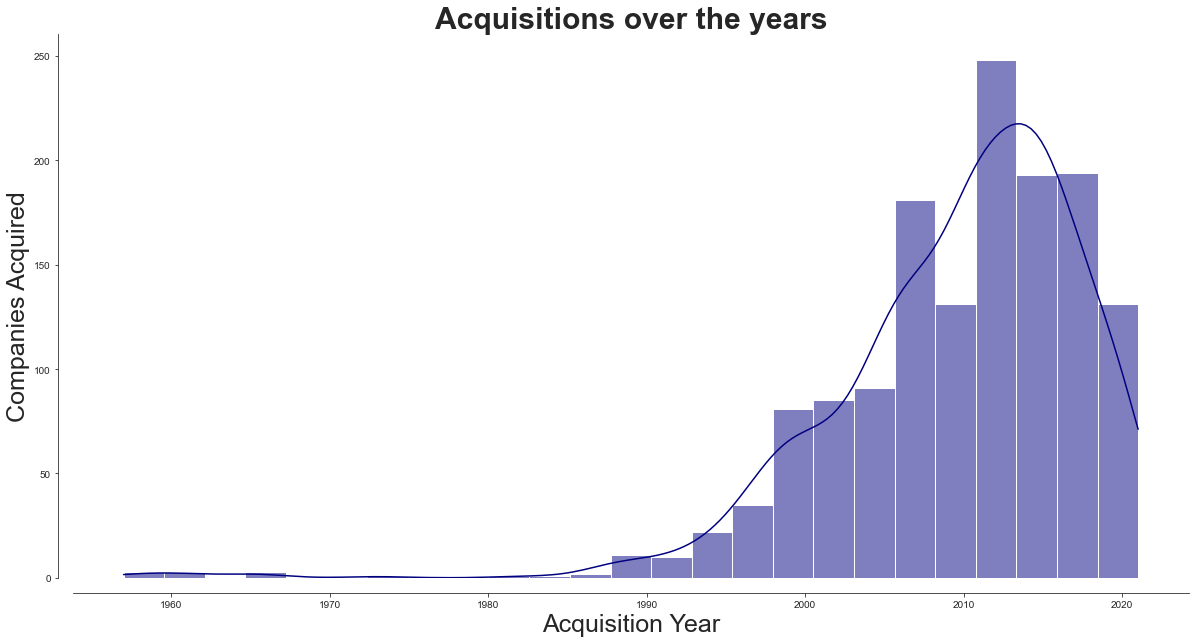

In [43]:
plt.figure(figsize=(20, 10))
sns.set_style("ticks")
plt.title("Acquisitions over the years", fontsize=30, fontweight="bold")
plt.xlabel("Acquisition Year", fontsize=25)
plt.ylabel("Companies Acquired", fontsize=25)
sns.histplot(data=data_cleaned, x="Acquisition Year", kde=True, bins=25,
             color="navy")
sns.despine(offset=15, trim=False)

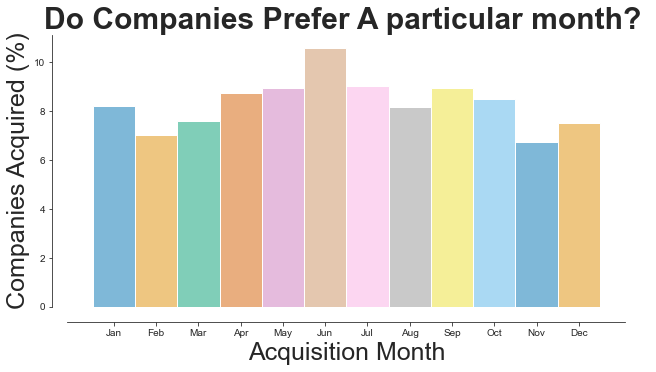

In [44]:
data_cleaned['Acquisition Month'] = pd.Categorical(data_cleaned['Acquisition Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                                                                                       'Sep', 'Oct', 'Nov',
                                                                                       'Dec'])

plt.figure(figsize=(10, 5))
sns.set_style("ticks")
plt.title("Do Companies Prefer A particular month? ",
          fontsize=30, fontweight="bold")
plt.xlabel("Acquisition Month", fontsize=25)
plt.ylabel("Companies Acquired (%)", fontsize=25)
sns.histplot(data=data_cleaned, x="Acquisition Month", hue="Acquisition Month", stat="percent",
             legend=False, palette="colorblind")
sns.despine(offset=15, trim=False)

In [45]:
companies = data_cleaned["Parent Company"].value_counts().reset_index()
companies = companies.rename(
    {"index": "Company", "Parent Company": "Acquired Companies"}, axis=1)
companies

,Company,Acquired Companies
0,Microsoft,258
1,Google,244
2,Ibm,182
3,Hp,129
4,Apple,123
5,Amazon,108
6,Facebook,93
7,Twitter,65
8,Ebay,63
9,Adobe,52


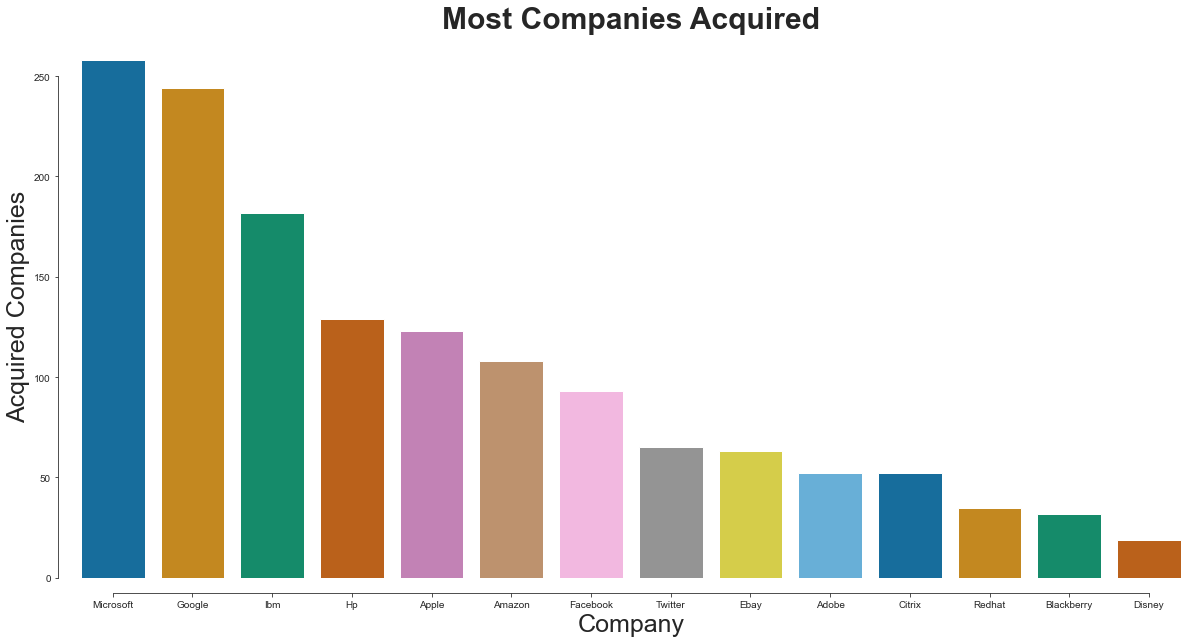

In [46]:
plt.figure(figsize=(20, 10))
sns.set_style("ticks")
plt.title("Most Companies Acquired", fontsize=30, fontweight="bold")
plt.xlabel("Acquisition Year", fontsize=25)
plt.ylabel("Companies Acquired", fontsize=25)
sns.barplot(data=companies, x="Company",
            y="Acquired Companies", palette="colorblind")
sns.despine(offset=15, trim=True)

In [47]:
data_cleaned["Acquired Company"].value_counts().head()

Disneyland, Inc.       2
Wrather Corporation    2
Magento                2
Blackthorne            1
mobile.de              1
Name: Acquired Company, dtype: int64

In [48]:
business_types = data_cleaned["Business"].value_counts().reset_index()
business_types = business_types.rename(
    {"index": "Business", "Business": "Number of Companies"}, axis=1)
business_types = business_types.head(25)
business_types

,Business,Number of Companies
0,Software,52
1,Computer software,37
2,Video games,18
3,Information technology,15
4,Internet software,12
5,Classified advertising,8
6,Information technology consulting,7
7,Electronic commerce,7
8,Online auction,6
9,Artificial intelligence,6


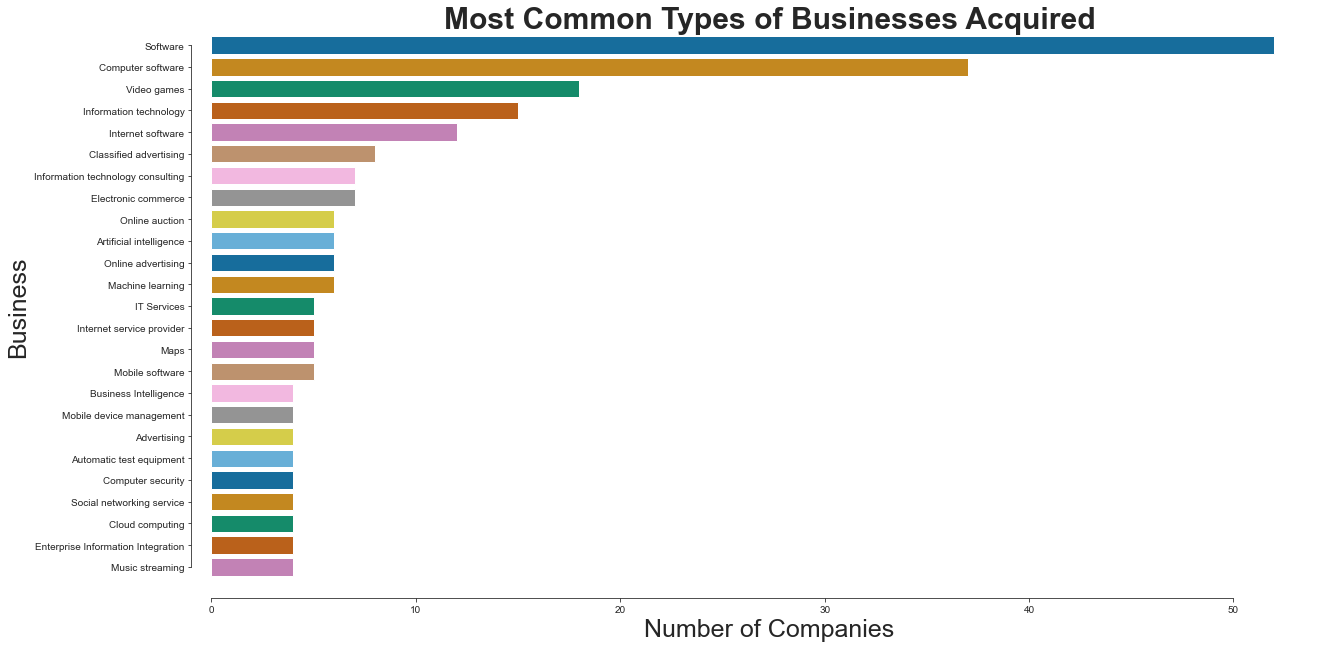

In [49]:
plt.figure(figsize=(20, 10))
sns.set_style("ticks")
plt.title("Most Common Types of Businesses Acquired",
          fontsize=30, fontweight="bold")
plt.xlabel("No. of Companies", fontsize=25)
plt.ylabel("Type of Business", fontsize=25)
sns.barplot(data=business_types, x="Number of Companies",
            y="Business", palette="colorblind")
sns.despine(offset=20, trim=True)

In [50]:
data_cleaned.Category.value_counts()

Twitter Cortex              2
Mobile Twitter app (iOS)    1
Analytics tools             1
Revenue team                1
Revenue engineering team    1
Design                      1
MoPub                       1
Commerce                    1
Twitter Spaces              1
Name: Category, dtype: int64

In [51]:
new_products = data_cleaned["Derived Products"].value_counts().reset_index()
new_products = new_products.rename(
    {"index": "Derived Product", "Derived Products": "Number of Companies"}, axis=1)
new_products = new_products.head(25)
new_products

,Derived Product,Number of Companies
0,Google Cloud Platform,22
1,Android,19
2,Amazon Web Services,17
3,YouTube,12
4,X,9
5,Google Maps,9
6,Google+,7
7,Google Docs,7
8,Oculus Studio,5
9,Google Shopping,5


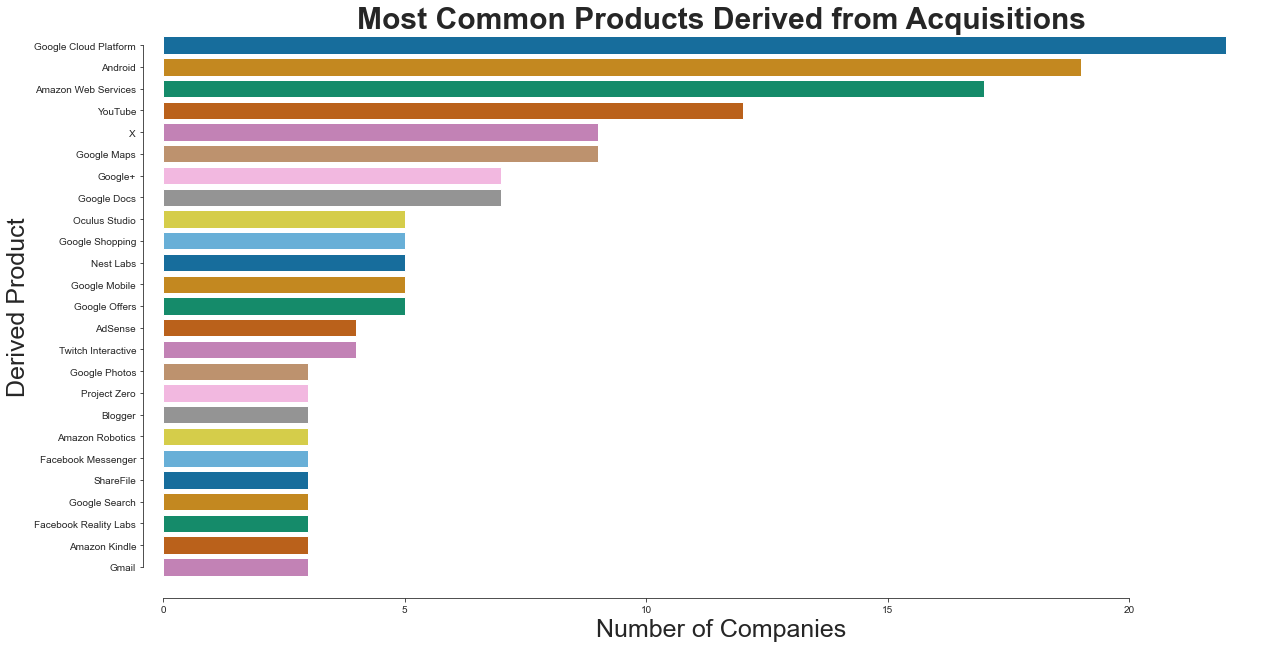

In [52]:
plt.figure(figsize=(20, 10))
sns.set_style("ticks")
plt.title("Most Common Products Derived from Acquisitions",
          fontsize=30, fontweight="bold")
plt.xlabel("No. of Companies", fontsize=25)
plt.ylabel("Type of Business", fontsize=25)
sns.barplot(data=new_products, y="Derived Product",
            x="Number of Companies", palette="colorblind")
sns.despine(offset=20, trim=True)

In [53]:
countries = data_cleaned["Country"].value_counts().reset_index()
countries = countries.rename(
    {"index": "Country", "Country": "Number of Companies"}, axis=1)
countries = countries.head(25)
countries

,Country,Number of Companies
0,United States,248
1,United Kingdom,17
2,Canada,14
3,Ireland,9
4,Germany,7
5,Israel,6
6,France,5
7,Australia,5
8,India,4
9,Sweden,2


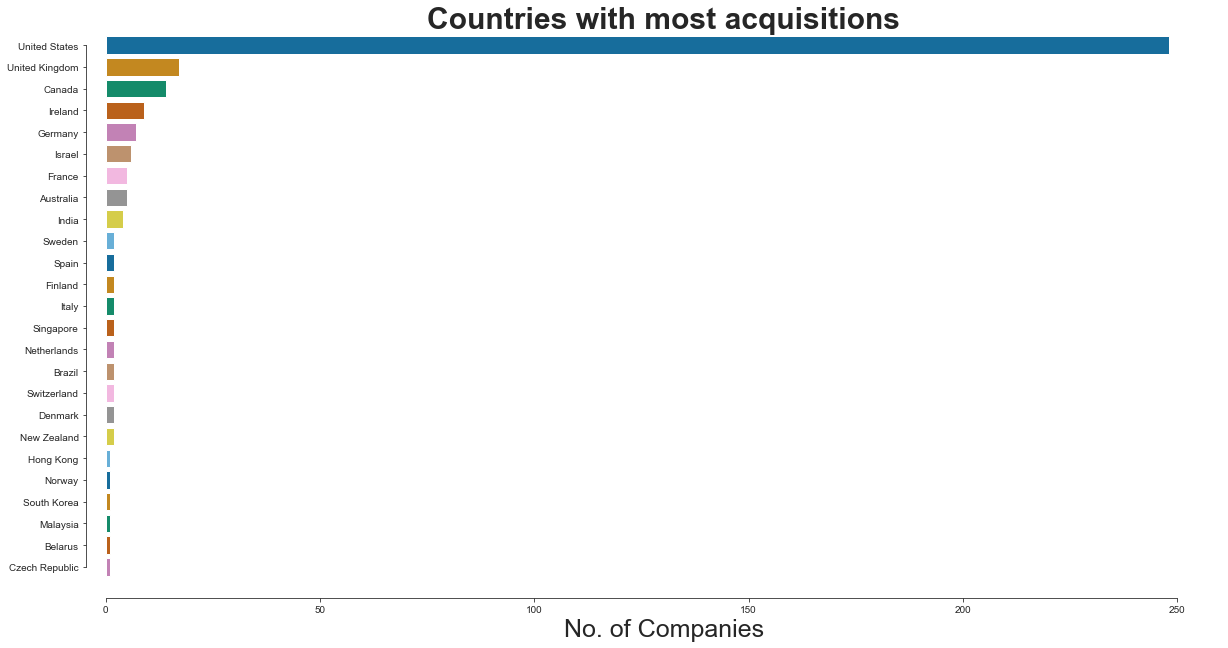

In [54]:
plt.figure(figsize=(20, 10))
sns.set_style("ticks")
plt.title("Countries with most acquisitions",
          fontsize=30, fontweight="bold")
sns.barplot(data=countries, y="Country",
            x="Number of Companies", palette="colorblind")

plt.xlabel("No. of Companies", fontsize=25)
plt.ylabel("", fontsize=25)
sns.despine(offset=20, trim=True)

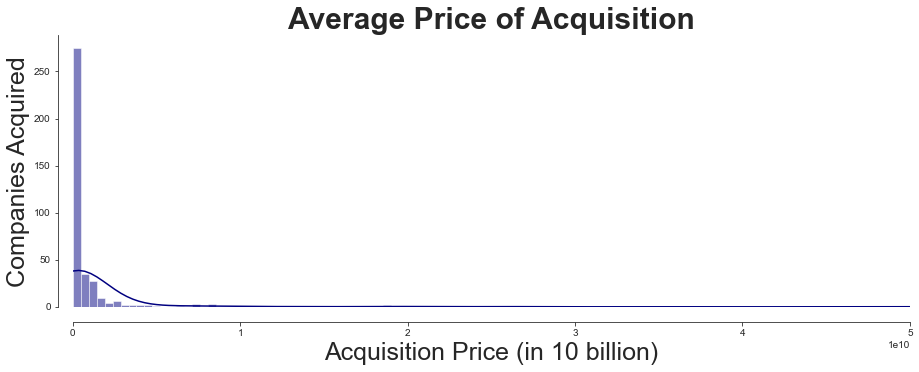

In [55]:
plt.figure(figsize=(15, 5))
sns.set_style("ticks")
plt.title("Average Price of Acquisition", fontsize=30, fontweight="bold")
plt.xlabel("Acquisition Price (in 10 billion)", fontsize=25)
plt.ylabel("Companies Acquired", fontsize=25)
sns.histplot(data=data_cleaned, x="Acquisition Price", kde=True, bins=150,
             color="navy")
plt.xlim(0, 5e10)

sns.despine(offset=15, trim=False)

In [56]:
most_valuable = data_cleaned.sort_values(
    "Acquisition Price", ascending=False).head(10)
most_valuable

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
1402,1403,Disney,2019.0,Mar,21st Century Fox,NaN,NaN,7.130000e+10,NaN,NaN
168,169,Twitter,2015.0,Mar,Periscope,Live-video streaming,NaN,5.010000e+10,NaN,NaN
1190,1191,Ibm,2019.0,Jul,Red Hat,Provider of open source software and solutions,United States,3.400000e+10,NaN,NaN
872,873,Microsoft,2016.0,Dec,LinkedIn,Professional social network,NaN,2.620000e+10,NaN,NaN
350,351,Hp,2002.0,May,Compaq,Personal computer,NaN,2.500000e+10,NaN,NaN
917,918,Microsoft,2021.0,Apr,Nuance Communications,Speech synthesis and speech recognition,NaN,1.970000e+10,NaN,NaN
1303,1304,Facebook,2014.0,Feb,WhatsApp,NaN,United States,1.900000e+10,NaN,NaN
1390,1391,Disney,1996.0,Feb,Capital Cities/ABC Inc.,NaN,NaN,1.900000e+10,NaN,NaN
396,397,Hp,2008.0,Aug,Electronic Data Systems,Information technology consulting,NaN,1.390000e+10,NaN,NaN
267,268,Amazon,2017.0,Jun,Whole Foods Market,NaN,NaN,1.370000e+10,NaN,Whole Foods Market


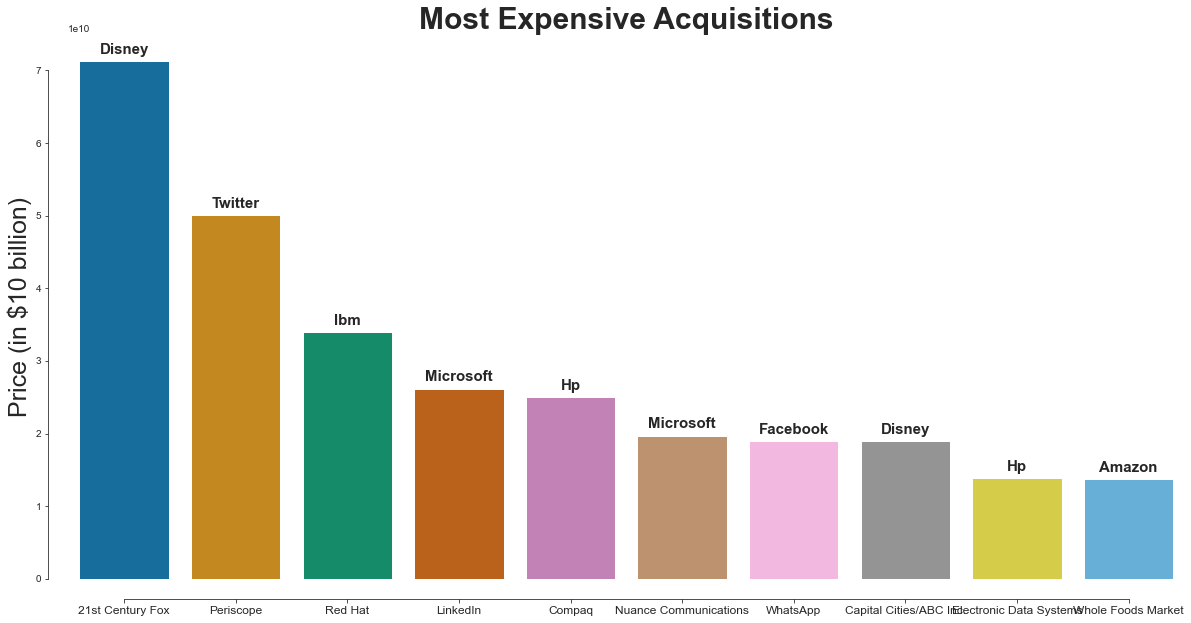

In [57]:
plt.figure(figsize=(20, 10))
sns.set_style("ticks")
plt.title("Most Expensive Acquisitions",
          fontsize=30, fontweight="bold")
ax = sns.barplot(data=most_valuable, x="Acquired Company",
                 y="Acquisition Price", palette="colorblind")
for bar, label in zip(ax.patches, most_valuable['Parent Company']):
    x = bar.get_x()
    width = bar.get_width()
    height = bar.get_height()
    ax.text(x+width/2., height + 0.1e10, label,
            ha="center", fontsize=15, fontweight="bold")

plt.ylabel("Price (in $10 billion)", fontsize=25)
plt.xlabel("")
ax.tick_params(axis="x", labelsize=12, rotation=90)
sns.despine(offset=20, trim=True)

In [58]:
average_spend = data_cleaned.groupby(['Parent Company']).mean(
).reset_index().sort_values("Acquisition Price", ascending=False)
average_spend

,Parent Company,ID,Acquisition Year,Acquisition Price
5,Disney,1394.0,1996.368421,8.137547e+09
13,Twitter,156.0,2013.984615,3.695226e+09
9,Hp,361.0,1999.891089,2.236599e+09
10,Ibm,1113.5,2010.109890,1.849158e+09
11,Microsoft,798.5,2008.445736,1.660034e+09
0,Adobe,1230.5,2006.365385,1.191624e+09
7,Facebook,1303.0,2014.258065,9.332577e+08
1,Amazon,242.5,2011.592593,8.416872e+08
6,Ebay,991.0,2008.317460,4.493438e+08
3,Blackberry,943.5,2010.312500,3.023906e+08


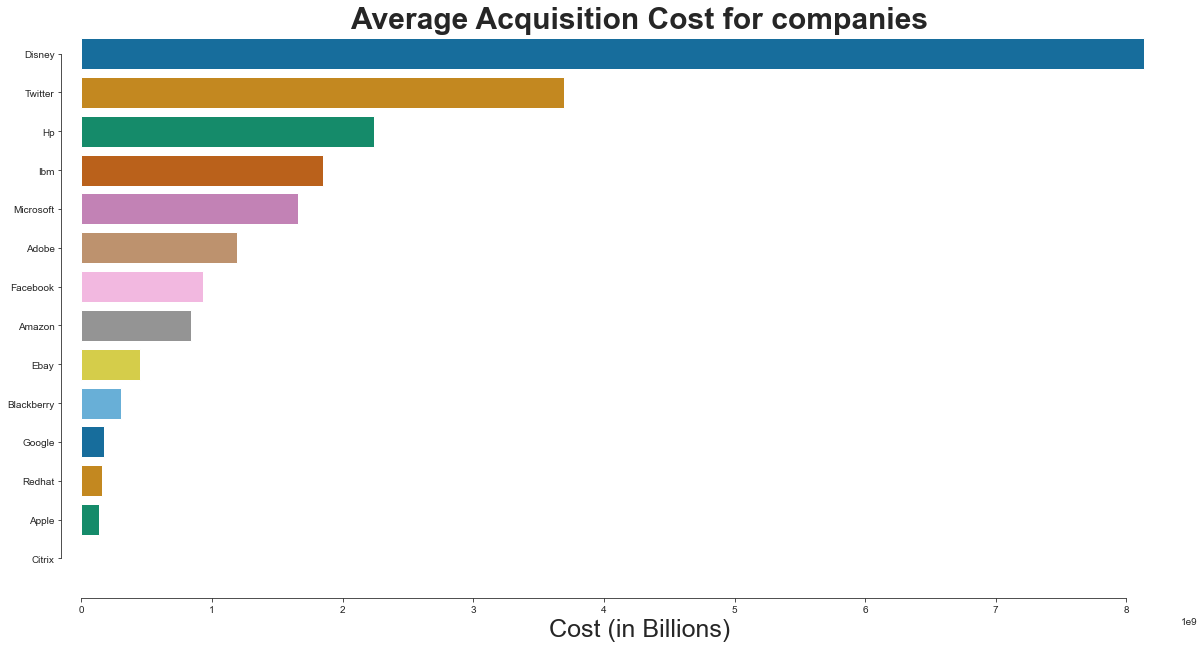

In [59]:
plt.figure(figsize=(20, 10))
sns.set_style("ticks")
plt.title("Average Acquisition Cost for companies",
          fontsize=30, fontweight="bold")
sns.barplot(data=average_spend, y="Parent Company",
            x="Acquisition Price", palette="colorblind")

plt.xlabel("Cost (in Billions)", fontsize=25)
plt.ylabel("", fontsize=25)
sns.despine(offset=20, trim=True)

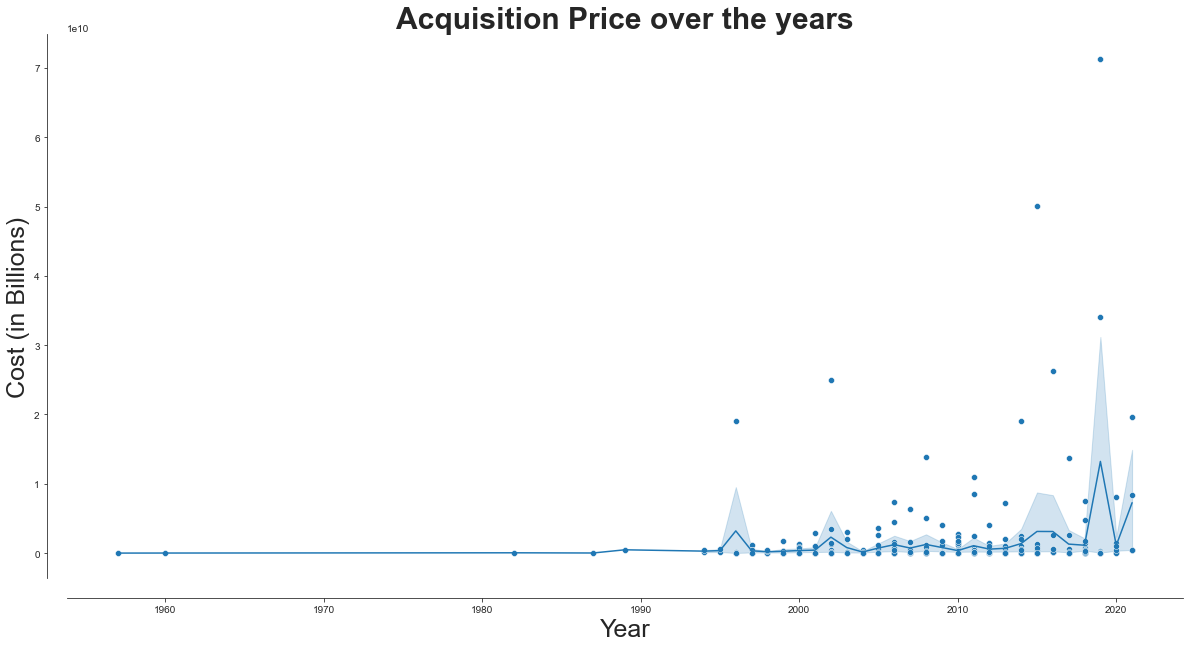

In [60]:
plt.figure(figsize=(20, 10))
sns.set_style("ticks")

plt.title("Acquisition Price over the years",
          fontsize=30, fontweight="bold")
sns.lineplot(data=data_cleaned, x='Acquisition Year',
             y='Acquisition Price')

sns.scatterplot(data=data_cleaned, x='Acquisition Year',
             y='Acquisition Price', palette="colorblind")
plt.ylabel("Cost (in Billions)", fontsize=25)
plt.xlabel("Year", fontsize=25)
sns.despine(offset=20, trim=False)

In [61]:
years_active = data_cleaned.groupby(
    ['Parent Company', 'Acquisition Year']).count().reset_index()
years_active = years_active.groupby(['Parent Company']).count()
years_active

,Acquisition Year,ID,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
Parent Company,,,,,,,,,
Adobe,26,26,26,26,26,26,26,26,26
Amazon,21,21,21,21,21,21,21,21,21
Apple,23,23,23,23,23,23,23,23,23
Blackberry,13,13,13,13,13,13,13,13,13
Citrix,21,21,21,21,21,21,21,21,21
Disney,18,18,18,18,18,18,18,18,18
Ebay,22,22,22,22,22,22,22,22,22
Facebook,16,16,16,16,16,16,16,16,16
Google,20,20,20,20,20,20,20,20,20
